Text(0.5, 0.92, '3D plot image ')

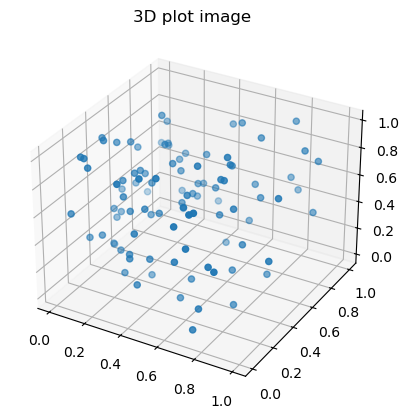

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 

# x_data = np.random.rand(50) * 100
# y_data = np.random.rand(50) * 100

#scatter display of the data or display like the dot is by using the scatetr 
# plt.scat ter(x_data , y_data,marker = "*")

#another for of display was the plot which means like the line chatr
# years =[ 2006 + x for x in range(16)]
# weight = [10,20,30 ,40 ,50 ,60,70,80,90,50,11,12,13,14,15,16]
# plt.plot(years,weight, c = "r")
# plt.title("Income of the Years")
# plt.bar(years,weight)  usage the barchart instead of the plot and the scatter 

#printing the 3D images using the scatter rather than 2D ones for more works 

ax = plt.axes(projection="3d")

x = np.random.random(100)
y = np.random.random(100)
z = np.random.random(100)
ax.scatter(x,y,z)
ax.set_title("3D plot image ")